In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install tensorflow scikit-learn

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout,
    BatchNormalization, GlobalAveragePooling2D, Input
)
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import numpy as np
import os


In [4]:
train_dir = '/content/drive/MyDrive/IA2 PROYECTO/Bone Break Classification/train'
test_dir = '/content/drive/MyDrive/IA2 PROYECTO/Bone Break Classification/test'


# Crear el generador de datos con el preprocesamiento necesario
def grayscale_preprocessing(x):
    return np.mean(x, axis=-1, keepdims=True)  # Promedio de los 3 canales (RGB) para convertir a gris

# Configuración de ImageDataGenerator con preprocesamiento
datagen = ImageDataGenerator(
    rescale=1.0/255,           # Normalización de imágenes (de 0 a 1)
    preprocessing_function=grayscale_preprocessing  # Función para convertir a gris

)

# Generador de entrenamiento
train_generator = datagen.flow_from_directory(
    train_dir,                  # Ruta a los datos de entrenamiento
    target_size=(128, 128),     # Redimensionar las imágenes a 128x128
    color_mode='grayscale',     # Convertir imágenes a escala de grises
    batch_size=32,              # Tamaño de lote
    class_mode='categorical'    # Clasificación multiclase
)

# Generador de prueba
test_generator = datagen.flow_from_directory(
    test_dir,                   # Ruta a los datos de prueba
    target_size=(128, 128),     # Redimensionar las imágenes a 128x128
    color_mode='grayscale',     # Convertir imágenes a escala de grises
    batch_size=32,              # Tamaño de lote
    class_mode='categorical'    # Clasificación multiclase
)



Found 703 images belonging to 6 classes.
Found 91 images belonging to 6 classes.


# MODELOS CON RMSPROP






BASE

In [ ]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), input_shape=(128, 128, 1)))
# Capa convolucional 2
model1.add(Conv2D(64, (3, 3) ))
# Capa convolucional 3
model1.add(Conv2D(128, (3, 3)))
# Aplanar las salidas para la capa densa
model1.add(Flatten())
# Capa densa 1
model1.add(Dense(128))
# Capa de salida (ajusta el número de clases según tu caso)
model1.add(Dense(train_generator.num_classes, activation='softmax'))
# Compilar el modelo
model1.compile( loss='categorical_crossentropy', metrics=['accuracy'])
# Resumen del modelo
model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 124, 124, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 122, 122, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 1905152)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │     243,859,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,953,030 (930.61 MB)

 Trainable params: 243,953,030 (930.61 MB)

 Non-trainable params: 0 (0.00 B)

**ENTRENAMIENTO DEL MODELO BASE**


In [ ]:
# Entrenar el modelo
history = model1.fit(
    train_generator,  # Generador de datos de entrenamiento
    epochs=10,        # Número de épocas (ajustar según sea necesario)
    validation_data=test_generator  # Generador de datos de validación
)


# Evaluación del modelo en el conjunto de prueba
loss, accuracy = model1.evaluate(test_generator)
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {accuracy}')

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 260s 12s/step - accuracy: 0.1611 - loss: 870.4205 - val_accuracy: 0.1538 - val_loss: 71.6952
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 257s 12s/step - accuracy: 0.1881 - loss: 49.4952 - val_accuracy: 0.1538 - val_loss: 164.8021
Epoch 3/10
 2/22 ━━━━━━━━━━━━━━━━━━━━ 3:16 10s/step - accuracy: 0.2578 - loss: 122.0690

KeyboardInterrupt: 

**MODELO_2 con MaxPooling2D**

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape=(128, 128, 1)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Capa convolucional 2
model2.add(Conv2D(64, (3, 3) ))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Capa convolucional 3
model2.add(Conv2D(128, (3, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Aplanar las salidas para la capa densa
model2.add(Flatten())

# Capa densa 1
model2.add(Dense(128))

# Capa de salida (ajusta el número de clases según tu caso)
model2.add(Dense(train_generator.num_classes, activation='softmax'))

learning_rate = 0.001  # Puedes ajustar este valor
optimizer = RMSprop(learning_rate=learning_rate)

# Compilar el modelo
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)                   │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,838 (12.61 MB)

 Trainable params: 3,304,838 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

**ENTRENAMIENTO DEL MODELO_2**

In [ ]:
# Entrenar el modelo
history = model2.fit(
    train_generator,  # Generador de datos de entrenamiento
    epochs=10,        # Número de épocas (ajustar según sea necesario)
    validation_data=test_generator  # Generador de datos de validación
)


# Evaluación del modelo en el conjunto de prueba
loss, accuracy = model2.evaluate(test_generator)
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {accuracy}')

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.1866 - loss: 12.4109 - val_accuracy: 0.2088 - val_loss: 1.8147
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.2639 - loss: 1.7544 - val_accuracy: 0.1978 - val_loss: 1.8499
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.2901 - loss: 2.5976 - val_accuracy: 0.1319 - val_loss: 1.9697
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.3652 - loss: 1.5801 - val_accuracy: 0.2747 - val_loss: 1.8457
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.3905 - loss: 1.8667 - val_accuracy: 0.3187 - val_loss: 1.7023
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5248 - loss: 1.3230 - val_accuracy: 0.1538 - val_loss: 2.2517
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.4670 - loss: 1.4652 - val_accuracy: 0.3626 - val_loss: 1.7335
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.6512 - loss: 1.0034 - val_accuracy: 0.3077 - val_loss

**GENERAR PREDICCION DEL MODELO_2**

In [ ]:

#Generar predicciones en los datos de prueba
y_pred = model2.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Obtener las clases predichas

# Verdaderas etiquetas (si usas un generator, accede a .classes)
y_true = test_generator.classes

# Obtener el reporte de clasificación
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys(), output_dict=True)

# Imprimir el reporte completo
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Extraer las métricas individuales y calcular los promedios
precision = np.mean([report[key]['precision'] for key in report if key != 'accuracy'])
recall = np.mean([report[key]['recall'] for key in report if key != 'accuracy'])
f1_score = np.mean([report[key]['f1-score'] for key in report if key != 'accuracy'])

# Imprimir los promedios
print(f"\nPromedio de Precisión: {precision:.4f}")
print(f"Promedio de Recall: {recall:.4f}")
print(f"Promedio de F1-Score: {f1_score:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 285ms/step
                       precision    recall  f1-score   support

    Avulsion fracture       0.27      0.21      0.24        14
  Comminuted fracture       0.25      0.29      0.27        14
 Fracture Dislocation       0.27      0.16      0.20        19
  Greenstick fracture       0.22      0.12      0.16        16
    Hairline Fracture       0.10      0.30      0.15        10
Pathological fracture       0.07      0.06      0.06        18

             accuracy                           0.18        91
            macro avg       0.20      0.19      0.18        91
         weighted avg       0.20      0.18      0.18        91


Promedio de Precisión: 0.1983
Promedio de Recall: 0.1880
Promedio de F1-Score: 0.1798


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 640ms/step - accuracy: 0.3646 - loss: 1.9356
Pérdida: 1.9418, Precisión: 0.3594


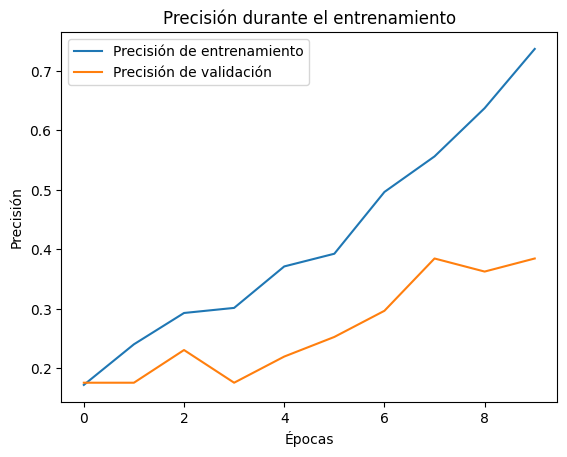

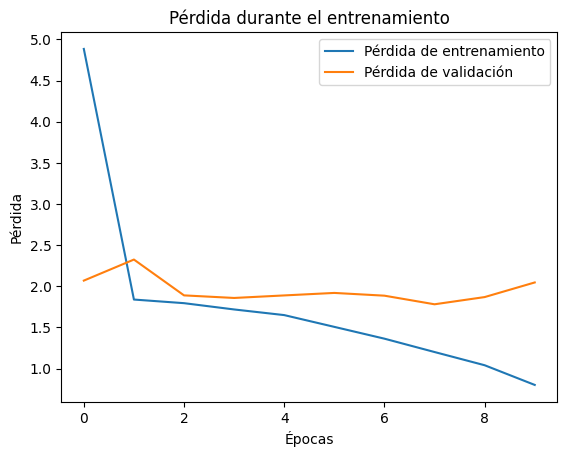

In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model2.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Pérdida: {loss:.4f}, Precisión: {accuracy:.4f}')

# Graficar precisión
import matplotlib.pyplot as plt

# Graficar precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento')
plt.show()

# Graficar pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento')
plt.show()

MODELO_3

In [ ]:
model3 = Sequential()

# Capa convolucional 1 (menos filtros)
model3.add(Conv2D(32, (3, 3), input_shape=(128, 128, 1)))
# MaxPooling
model3.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout después de la primera capa convolucional
model3.add(Dropout(0.3))

# Capa convolucional 2 (menos filtros)
model3.add(Conv2D(64, (3, 3)))
# MaxPooling
model3.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout después de la segunda capa convolucional
model3.add(Dropout(0.3))

# Capa convolucional 3 (menos filtros)
model3.add(Conv2D(128, (3, 3)))
# MaxPooling
model3.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout después de la tercera capa convolucional
model3.add(Dropout(0.4))

# Aplanar las salidas para la capa densa
model3.add(Flatten())

# Capa densa 1 (menos neuronas)
model3.add(Dense(128))
# Dropout después de la capa densa 1
model3.add(Dropout(0.5))

# Capa de salida
model3.add(Dense(train_generator.num_classes, activation='softmax'))

# Configurar el optimizador RMSprop con learning_rate ajustable
learning_rate = 0.001  # Puedes ajustar este valor
optimizer = RMSprop(learning_rate=learning_rate)

# Compilar el modelo
model3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model3.summary()


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_61 (Conv2D)                   │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_58 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_62 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_59 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_63 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_60 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_19 (Flatten)                 │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,838 (12.61 MB)

 Trainable params: 3,304,838 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenar el modelo 3
history = model3.fit(
    train_generator,  # Generador de datos de entrenamiento
    epochs=10,        # Número de épocas (ajustar según sea necesario)
    validation_data=test_generator  # Generador de datos de validación
)


# Evaluación del modelo en el conjunto de prueba
loss, accuracy = model3.evaluate(test_generator)
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {accuracy}')

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.1764 - loss: 7.2909 - val_accuracy: 0.1758 - val_loss: 2.0695
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.2750 - loss: 1.7615 - val_accuracy: 0.1758 - val_loss: 2.3253
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.3001 - loss: 1.7811 - val_accuracy: 0.2308 - val_loss: 1.8899
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.3057 - loss: 1.7183 - val_accuracy: 0.1758 - val_loss: 1.8586
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.3626 - loss: 1.6375 - val_accuracy: 0.2198 - val_loss: 1.8894
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.3969 - loss: 1.5003 - val_accuracy: 0.2527 - val_loss: 1.9197
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.4988 - loss: 1.3510 - val_accuracy: 0.2967 - val_loss: 1.8864
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5745 - loss: 1.1775 - val_accuracy: 0.3846 - val_loss:

In [ ]:

#Generar predicciones en los datos de prueba
y_pred = model3.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Obtener las clases predichas

# Verdaderas etiquetas (si usas un generator, accede a .classes)
y_true = test_generator.classes

# Obtener el reporte de clasificación
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys(), output_dict=True)

# Imprimir el reporte completo
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Extraer las métricas individuales y calcular los promedios
precision = np.mean([report[key]['precision'] for key in report if key != 'accuracy'])
recall = np.mean([report[key]['recall'] for key in report if key != 'accuracy'])
f1_score = np.mean([report[key]['f1-score'] for key in report if key != 'accuracy'])

# Imprimir los promedios
print(f"\nPromedio de Precisión: {precision:.4f}")
print(f"Promedio de Recall: {recall:.4f}")
print(f"Promedio de F1-Score: {f1_score:.4f}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 298ms/step
                       precision    recall  f1-score   support

    Avulsion fracture       0.38      0.36      0.37        14
  Comminuted fracture       0.18      0.21      0.19        14
 Fracture Dislocation       0.38      0.32      0.34        19
  Greenstick fracture       0.37      0.44      0.40        16
    Hairline Fracture       0.33      0.50      0.40        10
Pathological fracture       0.18      0.11      0.14        18

             accuracy                           0.31        91
            macro avg       0.30      0.32      0.31        91
         weighted avg       0.30      0.31      0.30        91


Promedio de Precisión: 0.3031
Promedio de Recall: 0.3208
Promedio de F1-Score: 0.3065


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.4271 - loss: 1.9196
Pérdida: 1.9479, Precisión: 0.4219


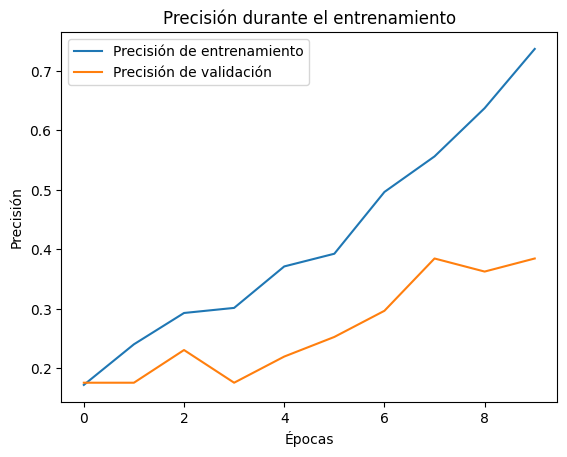

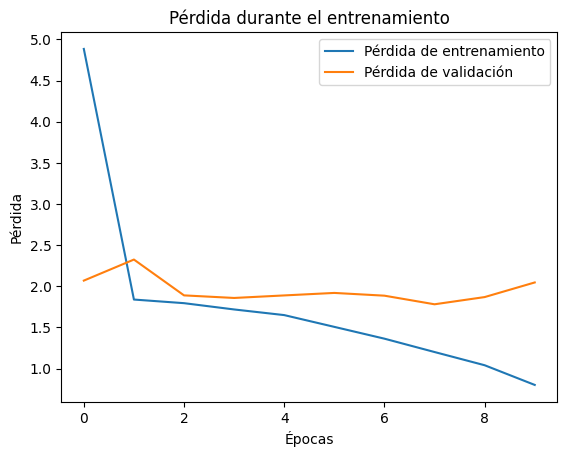

In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model3.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Pérdida: {loss:.4f}, Precisión: {accuracy:.4f}')

# Graficar precisión
import matplotlib.pyplot as plt

# Graficar precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento')
plt.show()

# Graficar pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento')
plt.show()

MODELO_4

In [ ]:
from tensorflow.keras import regularizers

# Definir el callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitorear la pérdida en el conjunto de validación
    patience=3,          # Número de épocas sin mejora antes de detener
    restore_best_weights=True  # Restaurar los pesos de la mejor época
)

model4 = Sequential()

# Capa convolucional 1
model4.add(Conv2D(32, (3, 3), input_shape=(128, 128, 1), kernel_regularizer=regularizers.l1_l2(0.01)))
model4.add(MaxPooling2D(pool_size=(2, 2)))

# Capa convolucional 2
model4.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l1_l2(0.01)))
model4.add(MaxPooling2D(pool_size=(2, 2)))

# Capa convolucional 3
model4.add(Conv2D(128, (3, 3), kernel_regularizer=regularizers.l1_l2(0.01)))
model4.add(MaxPooling2D(pool_size=(2, 2)))

# Capa convolucional 4
model4.add(Conv2D(128, (3, 3), kernel_regularizer=regularizers.l1_l2(0.01)))
model4.add(MaxPooling2D(pool_size=(2, 2)))

# Aplanar las salidas para la capa densa
model4.add(Flatten())

# Capa densa 1
model4.add(Dense(128, activation='relu'))

# Capa de salida (ajusta el número de clases según tu caso)
model4.add(Dense(train_generator.num_classes, activation='softmax'))

learning_rate = 0.001  # Puedes ajustar este valor
optimizer = RMSprop(learning_rate=learning_rate)

# Compilar el modelo
model4.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# Resumen del modelo
model4.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 830,982 (3.17 MB)

 Trainable params: 830,982 (3.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenar el modelo 4
history = model4.fit(
    train_generator,  # Generador de datos de entrenamiento
    epochs=10,        # Número de épocas (ajustar según sea necesario)
    validation_data=test_generator  # Generador de datos de validación
)


# Evaluación del modelo en el conjunto de prueba
loss, accuracy = model4.evaluate(test_generator)
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {accuracy}')

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 154s 5s/step - accuracy: 0.1766 - loss: 49.5104 - val_accuracy: 0.1978 - val_loss: 18.0050
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.1755 - loss: 13.2385 - val_accuracy: 0.2088 - val_loss: 4.6927
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.1809 - loss: 4.1398 - val_accuracy: 0.2088 - val_loss: 3.2325
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.1861 - loss: 3.1437 - val_accuracy: 0.2088 - val_loss: 3.0341
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.1864 - loss: 3.0304 - val_accuracy: 0.2088 - val_loss: 3.0053
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.2101 - loss: 3.0014 - val_accuracy: 0.2088 - val_loss: 2.9896
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.2031 - loss: 2.9898 - val_accuracy: 0.2088 - val_loss: 2.9833
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.1701 - loss: 2.9874 - val_accuracy: 0.2088 - val_loss: 2.9822

In [ ]:
#Generar predicciones en los datos de prueba
y_pred = model4.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Obtener las clases predichas

# Verdaderas etiquetas (si usas un generator, accede a .classes)
y_true = test_generator.classes

# Obtener el reporte de clasificación
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys(), output_dict=True)

# Imprimir el reporte completo
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Extraer las métricas individuales y calcular los promedios
precision = np.mean([report[key]['precision'] for key in report if key != 'accuracy'])
recall = np.mean([report[key]['recall'] for key in report if key != 'accuracy'])
f1_score = np.mean([report[key]['f1-score'] for key in report if key != 'accuracy'])

# Imprimir los promedios
print(f"\nPromedio de Precisión: {precision:.4f}")
print(f"Promedio de Recall: {recall:.4f}")
print(f"Promedio de F1-Score: {f1_score:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 431ms/step
                       precision    recall  f1-score   support

    Avulsion fracture       0.00      0.00      0.00        14
  Comminuted fracture       0.00      0.00      0.00        14
 Fracture Dislocation       0.21      1.00      0.35        19
  Greenstick fracture       0.00      0.00      0.00        16
    Hairline Fracture       0.00      0.00      0.00        10
Pathological fracture       0.00      0.00      0.00        18

             accuracy                           0.21        91
            macro avg       0.03      0.17      0.06        91
         weighted avg       0.04      0.21      0.07        91


Promedio de Precisión: 0.0359
Promedio de Recall: 0.1719
Promedio de F1-Score: 0.0594


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step - accuracy: 0.2083 - loss: 2.9894
Pérdida: 2.9834, Precisión: 0.2031


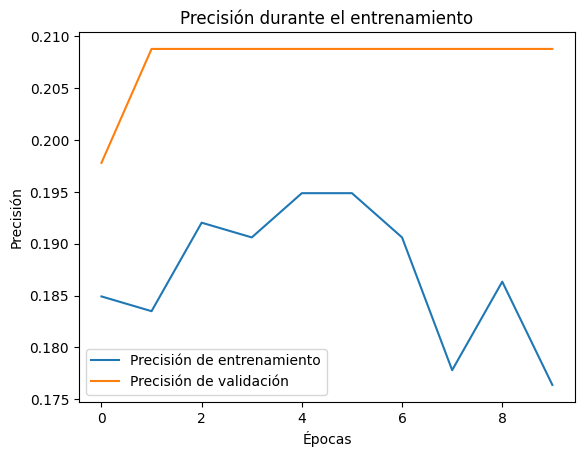

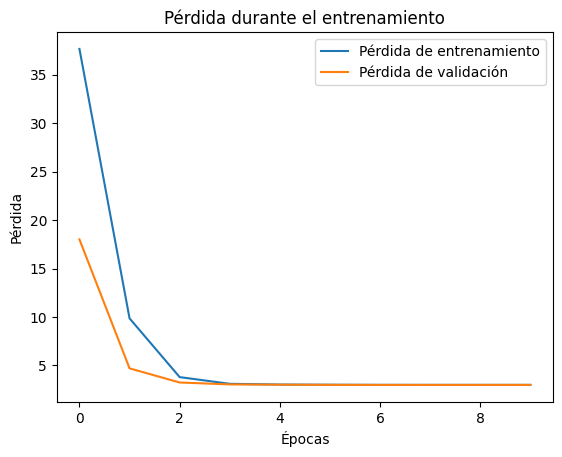

In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model4.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Pérdida: {loss:.4f}, Precisión: {accuracy:.4f}')

# Graficar precisión
import matplotlib.pyplot as plt

# Graficar precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento')
plt.show()

# Graficar pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento')
plt.show()

MODELO_5

In [ ]:
# Crear el modelo secuencial
model5 = Sequential()

# Primera capa convolucional + MaxPooling
model5.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(128, 128, 1)))  # Ajusta input_shape según tus datos
model5.add(MaxPooling2D(pool_size=(2, 2)))

# Segunda capa convolucional + MaxPooling
model5.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model5.add(MaxPooling2D(pool_size=(2, 2)))


# Tercera capa convolucional + MaxPooling
model5.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model5.add(MaxPooling2D(pool_size=(2, 2)))



# Aplanar la salida de las capas convolucionales
model5.add(Flatten())

# Capa densa con Dropout y L2 regularization
model5.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model5.add(Dropout(0.5))  # Dropout con una tasa del 50%

# Capa de salida (ajusta el número de unidades según tus clases)
model5.add(Dense(train_generator.num_classes, activation='softmax'))  # Cambia el número de clases a tu caso

# Compilación del modelo
model5.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model5.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_102 (Conv2D)                  │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_98 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_103 (Conv2D)                  │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_99 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_104 (Conv2D)                  │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_100 (MaxPooling2D)     │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_31 (Flatten)                 │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_47 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,838 (12.61 MB)

 Trainable params: 3,304,838 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenar el modelo 5
history = model5.fit(
    train_generator,  # Generador de datos de entrenamiento
    epochs=10,        # Número de épocas (ajustar según sea necesario)
    validation_data=test_generator  # Generador de datos de validación
)


# Evaluación del modelo en el conjunto de prueba
loss, accuracy = model5.evaluate(test_generator)
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {accuracy}')

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.1784 - loss: 4.3328 - val_accuracy: 0.1978 - val_loss: 2.5858
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.1930 - loss: 2.4176 - val_accuracy: 0.1429 - val_loss: 2.0899
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.1698 - loss: 2.0329 - val_accuracy: 0.1978 - val_loss: 1.9383
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.2342 - loss: 1.9006 - val_accuracy: 0.1209 - val_loss: 1.8827
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.2111 - loss: 1.8674 - val_accuracy: 0.1538 - val_loss: 1.8623
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.1994 - loss: 1.8355 - val_accuracy: 0.1648 - val_loss: 1.8433
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.2398 - loss: 1.8124 - val_accuracy: 0.1538 - val_loss: 1.8418
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.2373 - loss: 1.7958 - val_accuracy: 0.2198 - val_loss:

In [ ]:
#Generar predicciones en los datos de prueba
y_pred = model5.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Obtener las clases predichas

# Verdaderas etiquetas (si usas un generator, accede a .classes)
y_true = test_generator.classes

# Obtener el reporte de clasificación
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys(), output_dict=True)

# Imprimir el reporte completo
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Extraer las métricas individuales y calcular los promedios
precision = np.mean([report[key]['precision'] for key in report if key != 'accuracy'])
recall = np.mean([report[key]['recall'] for key in report if key != 'accuracy'])
f1_score = np.mean([report[key]['f1-score'] for key in report if key != 'accuracy'])

# Imprimir los promedios
print(f"\nPromedio de Precisión: {precision:.4f}")
print(f"Promedio de Recall: {recall:.4f}")
print(f"Promedio de F1-Score: {f1_score:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 325ms/step
                       precision    recall  f1-score   support

    Avulsion fracture       0.21      0.29      0.24        14
  Comminuted fracture       0.43      0.21      0.29        14
 Fracture Dislocation       0.29      0.32      0.30        19
  Greenstick fracture       0.11      0.12      0.12        16
    Hairline Fracture       0.20      0.30      0.24        10
Pathological fracture       0.27      0.17      0.21        18

             accuracy                           0.23        91
            macro avg       0.25      0.23      0.23        91
         weighted avg       0.25      0.23      0.23        91


Promedio de Precisión: 0.2517
Promedio de Recall: 0.2341
Promedio de F1-Score: 0.2321


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step - accuracy: 0.3854 - loss: 1.8323
Pérdida: 1.8192, Precisión: 0.3906


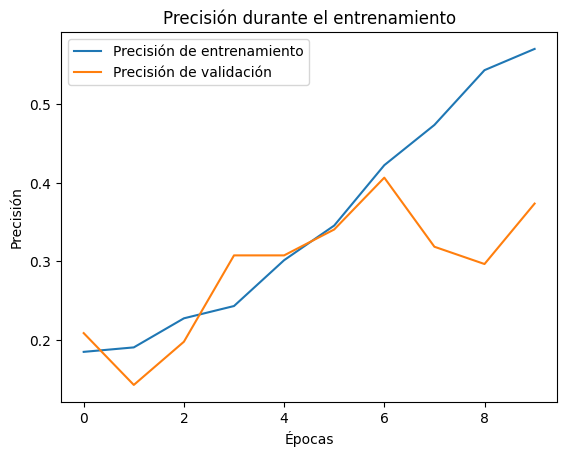

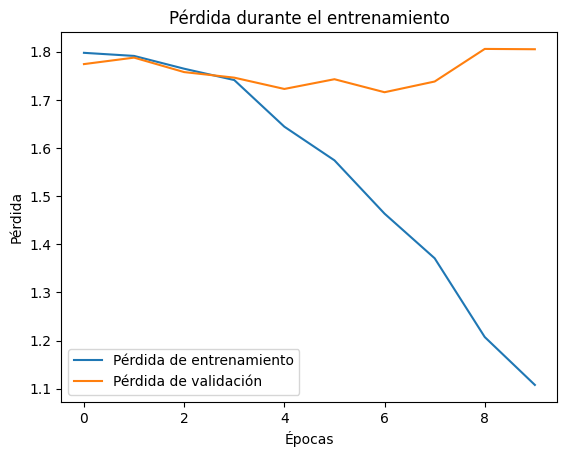

In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model5.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Pérdida: {loss:.4f}, Precisión: {accuracy:.4f}')

# Graficar precisión
import matplotlib.pyplot as plt

# Graficar precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento')
plt.show()

# Graficar pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento')
plt.show()

MODELO_6

In [ ]:
model6 = Sequential()

# Capa convolucional 1 (ahora acepta imágenes con un solo canal)
model6.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))  # 1 canal para escala de grises
model6.add(MaxPooling2D((2, 2)))

# Capa convolucional 2
model6.add(Conv2D(64, (3, 3), activation='relu'))
model6.add(MaxPooling2D((2, 2)))

# Capa convolucional 3
model6.add(Conv2D(128, (3, 3), activation='relu'))
model6.add(MaxPooling2D((2, 2)))

# Aplanar las salidas para la capa densa
model6.add(Flatten())

# Capa densa 1
model6.add(Dense(128, activation='relu'))
model6.add(Dropout(0.5))  # Dropout para evitar overfitting

# Capa de salida (ajusta el número de clases según tu caso)
model6.add(Dense(train_generator.num_classes, activation='softmax'))

learning_rate = 0.001  # Puedes ajustar este valor
optimizer = RMSprop(learning_rate=learning_rate)

# Compilar el modelo
model6.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model6.summary()


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_105 (Conv2D)                  │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_101 (MaxPooling2D)     │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_106 (Conv2D)                  │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_102 (MaxPooling2D)     │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_107 (Conv2D)                  │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_103 (MaxPooling2D)     │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_32 (Flatten)                 │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_48 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,838 (12.61 MB)

 Trainable params: 3,304,838 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenar el modelo
history = model6.fit(
    train_generator,  # Generador de datos de entrenamiento
    epochs=10,        # Número de épocas (ajustar según sea necesario)
    validation_data=test_generator  # Generador de datos de validación
)


# Evaluación del modelo en el conjunto de prueba
loss, accuracy = model6.evaluate(test_generator)
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {accuracy}')

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.2016 - loss: 1.8595 - val_accuracy: 0.1538 - val_loss: 1.7972
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.1724 - loss: 1.7982 - val_accuracy: 0.2308 - val_loss: 1.7885
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.2043 - loss: 1.7738 - val_accuracy: 0.2747 - val_loss: 1.7794
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.2432 - loss: 1.7643 - val_accuracy: 0.2967 - val_loss: 1.7684
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.3146 - loss: 1.6944 - val_accuracy: 0.2637 - val_loss: 1.7538
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.3421 - loss: 1.6241 - val_accuracy: 0.3297 - val_loss: 1.7219
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.3880 - loss: 1.5231 - val_accuracy: 0.3187 - val_loss: 1.7637
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.4640 - loss: 1.4096 - val_accuracy: 0.3297 - val_loss:

In [ ]:
#Generar predicciones en los datos de prueba
y_pred = model6.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Obtener las clases predichas

# Verdaderas etiquetas (si usas un generator, accede a .classes)
y_true = test_generator.classes

# Obtener el reporte de clasificación
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys(), output_dict=True)

# Imprimir el reporte completo
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Extraer las métricas individuales y calcular los promedios
precision = np.mean([report[key]['precision'] for key in report if key != 'accuracy'])
recall = np.mean([report[key]['recall'] for key in report if key != 'accuracy'])
f1_score = np.mean([report[key]['f1-score'] for key in report if key != 'accuracy'])

# Imprimir los promedios
print(f"\nPromedio de Precisión: {precision:.4f}")
print(f"Promedio de Recall: {recall:.4f}")
print(f"Promedio de F1-Score: {f1_score:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 292ms/step
                       precision    recall  f1-score   support

    Avulsion fracture       0.13      0.21      0.16        14
  Comminuted fracture       0.25      0.36      0.29        14
 Fracture Dislocation       0.27      0.16      0.20        19
  Greenstick fracture       0.43      0.19      0.26        16
    Hairline Fracture       0.00      0.00      0.00        10
Pathological fracture       0.17      0.22      0.19        18

             accuracy                           0.20        91
            macro avg       0.21      0.19      0.18        91
         weighted avg       0.22      0.20      0.20        91


Promedio de Precisión: 0.2100
Promedio de Recall: 0.1908
Promedio de F1-Score: 0.1860


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 312ms/step - accuracy: 0.3438 - loss: 2.1142
Pérdida: 2.0612, Precisión: 0.3438


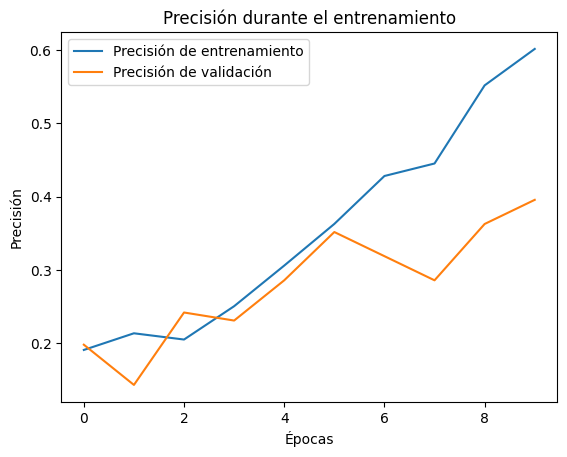

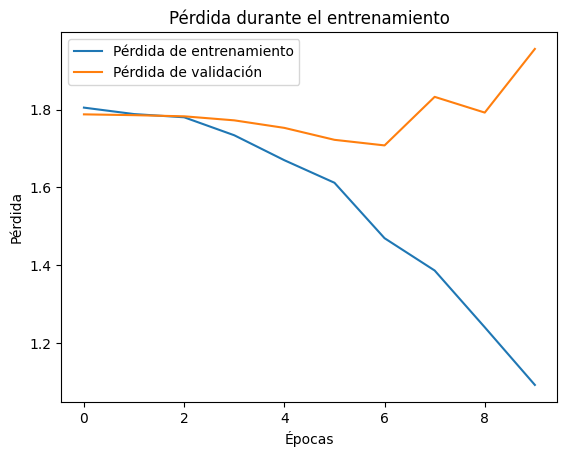

In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model6.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Pérdida: {loss:.4f}, Precisión: {accuracy:.4f}')

# Graficar precisión
import matplotlib.pyplot as plt

# Graficar precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento')
plt.show()

# Graficar pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento')
plt.show()

# MODELOS CON ADAM

MODELO_7

In [ ]:
# Crear el modelo secuencial
model7 = Sequential()

# Capa convolucional 1
model7.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model7.add(MaxPooling2D(pool_size=(2, 2)))

# Capa convolucional 2
model7.add(Conv2D(64, (3, 3), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))

# Capa convolucional 3
model7.add(Conv2D(128, (3, 3), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))


# Aplanar las salidas para la capa densa
model7.add(Flatten())


# Capa densa 1
model7.add(Dense(128))

# Capa de salida (ajusta el número de clases según tu caso)
model7.add(Dense(train_generator.num_classes, activation='softmax'))

# Configurar el optimizador Adam con un learning rate específico
adam_optimizer = Adam(learning_rate=0.001)

# Compilar el modelo
model7.compile(optimizer=adam_optimizer,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Resumen del modelo
model7.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,838 (12.61 MB)

 Trainable params: 3,304,838 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenar el modelo con datos de entrenamiento y validación
history = model7.fit(
    train_generator,  # Generador de datos de entrenamiento
    epochs=10,        # Número de épocas (puedes ajustar según sea necesario)
    validation_data=test_generator,  # Generador de datos de validación/prueba
)

loss, accuracy = model7.evaluate(test_generator)
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {accuracy}')

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.1882 - loss: 2.0222 - val_accuracy: 0.2198 - val_loss: 1.7865
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.3057 - loss: 1.7300 - val_accuracy: 0.2747 - val_loss: 1.7971
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 993ms/step - accuracy: 0.3950 - loss: 1.5113 - val_accuracy: 0.2857 - val_loss: 1.8551
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 995ms/step - accuracy: 0.4738 - loss: 1.3649 - val_accuracy: 0.3077 - val_loss: 2.1006
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 993ms/step - accuracy: 0.6083 - loss: 1.0643 - val_accuracy: 0.3956 - val_loss: 2.1196
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.6878 - loss: 0.8538 - val_accuracy: 0.3736 - val_loss: 2.7356
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 23s 996ms/step - accuracy: 0.8015 - loss: 0.6060 - val_accuracy: 0.4066 - val_loss: 2.9097
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8627 - loss: 0.4062 - val_accuracy: 0.3736

In [15]:
#Generar predicciones en los datos de prueba
y_pred = model7.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Obtener las clases predichas

# Verdaderas etiquetas (si usas un generator, accede a .classes)
y_true = test_generator.classes

# Obtener el reporte de clasificación
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys(), output_dict=True)

# Imprimir el reporte completo
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Extraer las métricas individuales y calcular los promedios
precision = np.mean([report[key]['precision'] for key in report if key != 'accuracy'])
recall = np.mean([report[key]['recall'] for key in report if key != 'accuracy'])
f1_score = np.mean([report[key]['f1-score'] for key in report if key != 'accuracy'])

# Imprimir los promedios
print(f"\nPromedio de Precisión: {precision:.4f}")
print(f"Promedio de Recall: {recall:.4f}")
print(f"Promedio de F1-Score: {f1_score:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 348ms/step
                       precision    recall  f1-score   support

    Avulsion fracture       0.33      0.29      0.31        14
  Comminuted fracture       0.10      0.14      0.12        14
 Fracture Dislocation       0.25      0.21      0.23        19
  Greenstick fracture       0.23      0.19      0.21        16
    Hairline Fracture       0.12      0.20      0.15        10
Pathological fracture       0.15      0.11      0.13        18

             accuracy                           0.19        91
            macro avg       0.20      0.19      0.19        91
         weighted avg       0.20      0.19      0.19        91


Promedio de Precisión: 0.1982
Promedio de Recall: 0.1893
Promedio de F1-Score: 0.1899


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 762ms/step - accuracy: 0.3958 - loss: 3.9597
Pérdida: 4.3871, Precisión: 0.3906


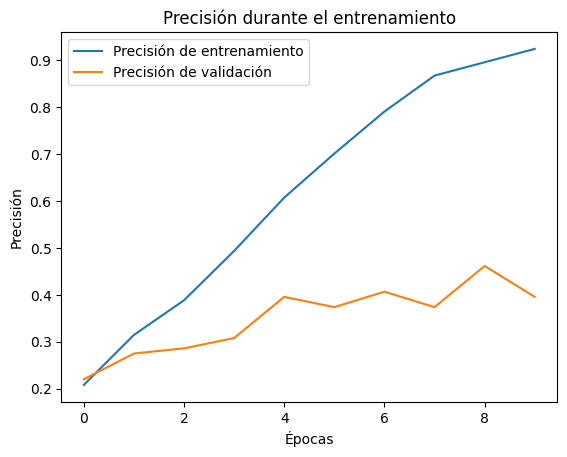

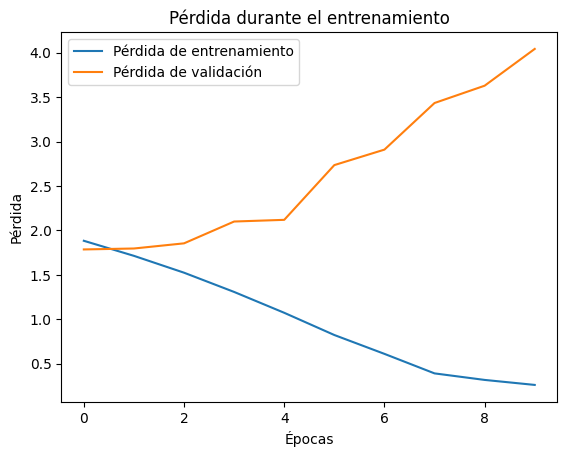

In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model7.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Pérdida: {loss:.4f}, Precisión: {accuracy:.4f}')

# Graficar precisión
import matplotlib.pyplot as plt

# Graficar precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento')
plt.show()

# Graficar pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento')
plt.show()

MODELO_8

In [16]:
# Crear el modelo secuencial
model8 = Sequential()

# Capa convolucional 1
model8.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Dropout(0.25))  # Dropout tras la primera capa convolucional

# Capa convolucional 2
model8.add(Conv2D(64, (3, 3), activation='relu'))
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Dropout(0.25))  # Dropout tras la segunda capa convolucional

# Capa convolucional 3
model8.add(Conv2D(128, (3, 3), activation='relu'))
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Dropout(0.25))  # Dropout tras la tercera capa convolucional

# Aplanar las salidas para la capa densa
model8.add(Flatten())

# Capa densa 1
model8.add(Dense(128, activation='relu',  kernel_regularizer=l2(0.01)))
model8.add(Dropout(0.5))  # Dropout tras la capa densa

# Capa de salida (ajusta el número de clases según tu caso)
model8.add(Dense(train_generator.num_classes, activation='softmax'))

# Configurar el optimizador Adam con un learning rate específico
adam_optimizer = Adam(learning_rate=0.001)

# Compilar el modelo
model8.compile(optimizer=adam_optimizer,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Resumen del modelo
model8.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,838 (12.61 MB)

 Trainable params: 3,304,838 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Entrenar el modelo con datos de entrenamiento y validación
history = model8.fit(
    train_generator,  # Generador de datos de entrenamiento
    epochs=10,        # Número de épocas (puedes ajustar según sea necesario)
    validation_data=test_generator,  # Generador de datos de validación/prueba
)

loss, accuracy = model8.evaluate(test_generator)
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {accuracy}')

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.1896 - loss: 4.1058 - val_accuracy: 0.1538 - val_loss: 2.6476
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.1760 - loss: 2.4905 - val_accuracy: 0.1868 - val_loss: 2.1579
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.2033 - loss: 2.0946 - val_accuracy: 0.1978 - val_loss: 1.9677
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.2148 - loss: 1.9240 - val_accuracy: 0.1868 - val_loss: 1.8877
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.2233 - loss: 1.8528 - val_accuracy: 0.2198 - val_loss: 1.8513
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.2493 - loss: 1.8243 - val_accuracy: 0.2418 - val_loss: 1.8428
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.2229 - loss: 1.8146 - val_accuracy: 0.2308 - val_loss: 1.8293
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.2600 - loss: 1.7778 - val_accuracy: 0.1978 - val_loss:

In [20]:
#Generar predicciones en los datos de prueba
y_pred = model8.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Obtener las clases predichas

# Verdaderas etiquetas (si usas un generator, accede a .classes)
y_true = test_generator.classes

# Obtener el reporte de clasificación
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys(), output_dict=True)

# Imprimir el reporte completo
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Extraer las métricas individuales y calcular los promedios
precision = np.mean([report[key]['precision'] for key in report if key != 'accuracy'])
recall = np.mean([report[key]['recall'] for key in report if key != 'accuracy'])
f1_score = np.mean([report[key]['f1-score'] for key in report if key != 'accuracy'])

# Imprimir los promedios
print(f"\nPromedio de Precisión: {precision:.4f}")
print(f"Promedio de Recall: {recall:.4f}")
print(f"Promedio de F1-Score: {f1_score:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step
                       precision    recall  f1-score   support

    Avulsion fracture       0.15      0.14      0.15        14
  Comminuted fracture       0.21      0.36      0.26        14
 Fracture Dislocation       0.18      0.32      0.23        19
  Greenstick fracture       1.00      0.06      0.12        16
    Hairline Fracture       0.50      0.10      0.17        10
Pathological fracture       0.22      0.22      0.22        18

             accuracy                           0.21        91
            macro avg       0.38      0.20      0.19        91
         weighted avg       0.37      0.21      0.19        91


Promedio de Precisión: 0.3765
Promedio de Recall: 0.2012
Promedio de F1-Score: 0.1918


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 470ms/step - accuracy: 0.2396 - loss: 1.8184
Pérdida: 1.8348, Precisión: 0.2031


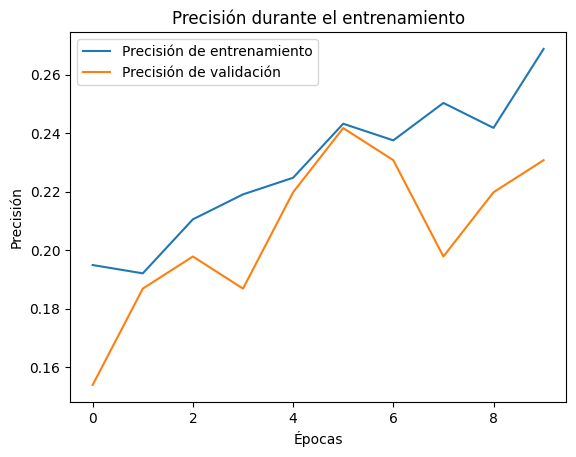

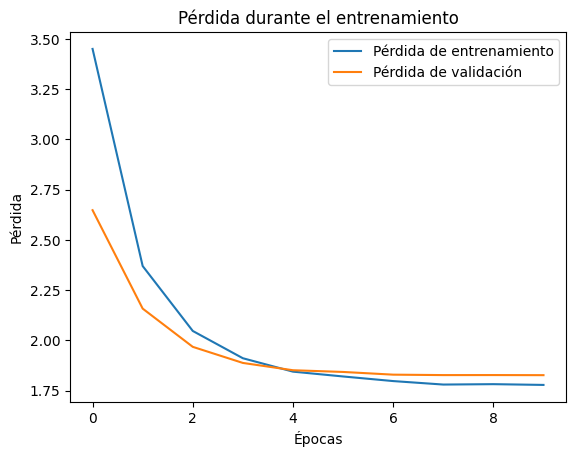

In [19]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model8.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Pérdida: {loss:.4f}, Precisión: {accuracy:.4f}')

# Graficar precisión
import matplotlib.pyplot as plt

# Graficar precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento')
plt.show()

# Graficar pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento')
plt.show()

MODELO_9

In [5]:
# Crear el modelo secuencial
model9 = Sequential()

# Capa convolucional 1
model9.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model9.add(MaxPooling2D(pool_size=(2, 2)))
model9.add(Dropout(0.25))



# Capa convolucional 2
model9.add(Conv2D(64, (3, 3), activation='relu'))
model9.add(MaxPooling2D(pool_size=(2, 2)))
model9.add(Dropout(0.25))



# Capa convolucional 3
model9.add(Conv2D(128, (3, 3), activation='relu'))
model9.add(MaxPooling2D(pool_size=(2, 2)))



# Aplanar las salidas para la capa densa
model9.add(Flatten())

# Capa densa 1
model9.add(Dense(128, activation='relu',  kernel_regularizer=l2(0.001)))
model9.add(Dropout(0.5))


# Capa de salida (ajusta el número de clases según tu caso)
model9.add(Dense(train_generator.num_classes, activation='softmax'))

# Configurar el optimizador Adam con un learning rate específico
adam_optimizer = Adam(learning_rate=0.0005)

# Compilar el modelo
model9.compile(optimizer=adam_optimizer,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Resumen del modelo
model9.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,838 (12.61 MB)

 Trainable params: 3,304,838 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Entrenar el modelo con datos de entrenamiento y validación
history = model9.fit(
    train_generator,  # Generador de datos de entrenamiento
    epochs=10,        # Número de épocas (puedes ajustar según sea necesario)
    validation_data=test_generator,  # Generador de datos de validación/prueba
)

loss, accuracy = model9.evaluate(test_generator)
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {accuracy}')

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 421s 13s/step - accuracy: 0.1883 - loss: 2.1197 - val_accuracy: 0.1978 - val_loss: 1.9785
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.2052 - loss: 1.9645 - val_accuracy: 0.2088 - val_loss: 1.9339
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.1866 - loss: 1.9281 - val_accuracy: 0.2088 - val_loss: 1.9043
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.2117 - loss: 1.8877 - val_accuracy: 0.2527 - val_loss: 1.8801
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.2335 - loss: 1.8354 - val_accuracy: 0.2637 - val_loss: 1.8491
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.2463 - loss: 1.7692 - val_accuracy: 0.2967 - val_loss: 1.8121
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.3441 - loss: 1.6874 - val_accuracy: 0.3297 - val_loss: 1.8346
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.3281 - loss: 1.6556 - val_accuracy: 0.3077 - val_loss: 1.8311
E

In [13]:
#Generar predicciones en los datos de prueba
y_pred = model9.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Obtener las clases predichas

# Verdaderas etiquetas (si usas un generator, accede a .classes)
y_true = test_generator.classes

# Obtener el reporte de clasificación
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys(), output_dict=True)

# Imprimir el reporte completo
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Extraer las métricas individuales y calcular los promedios
precision = np.mean([report[key]['precision'] for key in report if key != 'accuracy'])
recall = np.mean([report[key]['recall'] for key in report if key != 'accuracy'])
f1_score = np.mean([report[key]['f1-score'] for key in report if key != 'accuracy'])

# Imprimir los promedios
print(f"\nPromedio de Precisión: {precision:.4f}")
print(f"Promedio de Recall: {recall:.4f}")
print(f"Promedio de F1-Score: {f1_score:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 458ms/step
                       precision    recall  f1-score   support

    Avulsion fracture       0.18      0.29      0.22        14
  Comminuted fracture       0.29      0.14      0.19        14
 Fracture Dislocation       0.44      0.37      0.40        19
  Greenstick fracture       0.19      0.19      0.19        16
    Hairline Fracture       0.20      0.20      0.20        10
Pathological fracture       0.25      0.28      0.26        18

             accuracy                           0.25        91
            macro avg       0.26      0.24      0.24        91
         weighted avg       0.27      0.25      0.25        91


Promedio de Precisión: 0.2584
Promedio de Recall: 0.2448
Promedio de F1-Score: 0.2452


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 362ms/step - accuracy: 0.3750 - loss: 1.8601
Pérdida: 1.8608, Precisión: 0.3750


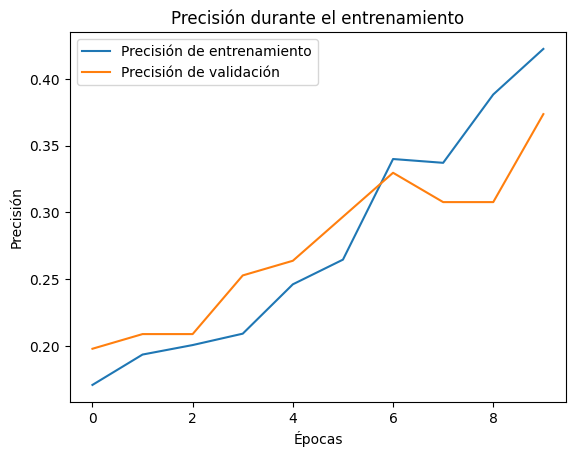

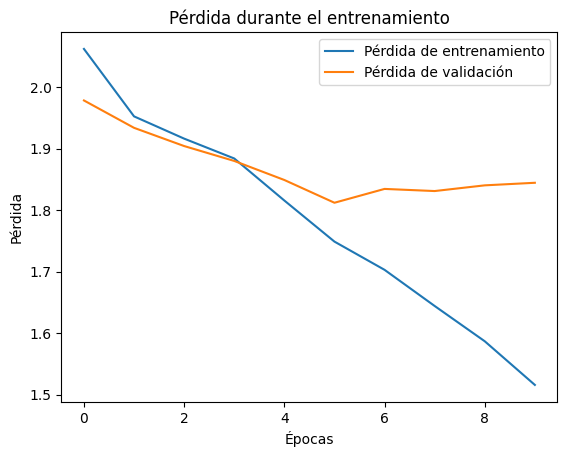

In [9]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model9.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Pérdida: {loss:.4f}, Precisión: {accuracy:.4f}')

# Graficar precisión
import matplotlib.pyplot as plt

# Graficar precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento')
plt.show()

# Graficar pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento')
plt.show()

MODELO_10

In [14]:
# Crear el modelo secuencial
model10 = Sequential()

# Capa convolucional 1 (menos filtros)
model10.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model10.add(MaxPooling2D(pool_size=(2, 2)))
model10.add(Dropout(0.3))

# Capa convolucional 2 (menos filtros)
model10.add(Conv2D(64, (3, 3), activation='relu'))
model10.add(MaxPooling2D(pool_size=(2, 2)))
model10.add(Dropout(0.3))

# Capa convolucional 3 (menos filtros)
model10.add(Conv2D(128, (3, 3), activation='relu'))
model10.add(MaxPooling2D(pool_size=(2, 2)))
model10.add(Dropout(0.4))

# Aplanar las salidas para la capa densa
model10.add(Flatten())

# Capa densa 1 (menos neuronas)
model10.add(Dense(128, activation='relu'))
model10.add(Dropout(0.5))

# Capa de salida
model10.add(Dense(train_generator.num_classes, activation='softmax'))

# Configurar el optimizador Adam con learning_rate ajustable
learning_rate = 0.001  # Puedes ajustar este valor
optimizer = Adam(learning_rate=learning_rate)

# Compilar el modelo
model10.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model10.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,838 (12.61 MB)

 Trainable params: 3,304,838 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Entrenar el modelo con datos de entrenamiento y validación
history = model10.fit(
    train_generator,  # Generador de datos de entrenamiento
    epochs=10,        # Número de épocas (puedes ajustar según sea necesario)
    validation_data=test_generator,  # Generador de datos de validación/prueba
)

loss, accuracy = model10.evaluate(test_generator)
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {accuracy}')

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.1525 - loss: 2.0707 - val_accuracy: 0.1429 - val_loss: 1.7921
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.2062 - loss: 1.7877 - val_accuracy: 0.1538 - val_loss: 1.7914
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.1782 - loss: 1.7907 - val_accuracy: 0.1538 - val_loss: 1.7910
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.1970 - loss: 1.7901 - val_accuracy: 0.2088 - val_loss: 1.7854
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.1871 - loss: 1.7962 - val_accuracy: 0.2088 - val_loss: 1.7783
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.2061 - loss: 1.7795 - val_accuracy: 0.1538 - val_loss: 1.7809
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.2427 - loss: 1.7391 - val_accuracy: 0.2747 - val_loss: 1.7698
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.2730 - loss: 1.7097 - val_accuracy: 0.2747 - val_loss:

In [16]:
#Generar predicciones en los datos de prueba
y_pred = model10.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Obtener las clases predichas

# Verdaderas etiquetas (si usas un generator, accede a .classes)
y_true = test_generator.classes

# Obtener el reporte de clasificación
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys(), output_dict=True)

# Imprimir el reporte completo
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Extraer las métricas individuales y calcular los promedios
precision = np.mean([report[key]['precision'] for key in report if key != 'accuracy'])
recall = np.mean([report[key]['recall'] for key in report if key != 'accuracy'])
f1_score = np.mean([report[key]['f1-score'] for key in report if key != 'accuracy'])

# Imprimir los promedios
print(f"\nPromedio de Precisión: {precision:.4f}")
print(f"Promedio de Recall: {recall:.4f}")
print(f"Promedio de F1-Score: {f1_score:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 292ms/step
                       precision    recall  f1-score   support

    Avulsion fracture       0.50      0.14      0.22        14
  Comminuted fracture       0.20      0.29      0.24        14
 Fracture Dislocation       0.29      0.11      0.15        19
  Greenstick fracture       0.23      0.50      0.31        16
    Hairline Fracture       0.00      0.00      0.00        10
Pathological fracture       0.25      0.33      0.29        18

             accuracy                           0.24        91
            macro avg       0.24      0.23      0.20        91
         weighted avg       0.26      0.24      0.21        91


Promedio de Precisión: 0.2457
Promedio de Recall: 0.2296
Promedio de F1-Score: 0.2033


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step - accuracy: 0.3125 - loss: 1.9194
Pérdida: 1.8777, Precisión: 0.2969


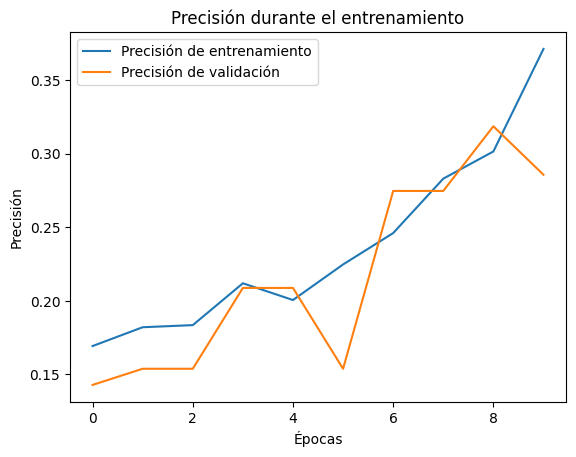

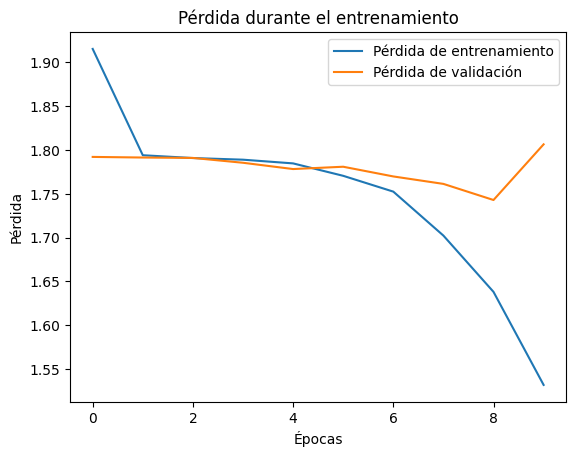

In [17]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model10.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Pérdida: {loss:.4f}, Precisión: {accuracy:.4f}')

# Graficar precisión
import matplotlib.pyplot as plt

# Graficar precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento')
plt.show()

# Graficar pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento')
plt.show()

MODELO_11

In [19]:
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Definir el callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitorear la pérdida en el conjunto de validación
    patience=3,          # Número de épocas sin mejora antes de detener
    restore_best_weights=True  # Restaurar los pesos de la mejor época
)

# Crear el modelo secuencial
model11 = Sequential()

# Capa convolucional 1
model11.add(Conv2D(32, (3, 3), input_shape=(128, 128, 1), kernel_regularizer=regularizers.l1_l2(0.01)))
model11.add(MaxPooling2D(pool_size=(2, 2)))

# Capa convolucional 2
model11.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l1_l2(0.01)))
model11.add(MaxPooling2D(pool_size=(2, 2)))

# Capa convolucional 3
model11.add(Conv2D(128, (3, 3), kernel_regularizer=regularizers.l1_l2(0.01)))
model11.add(MaxPooling2D(pool_size=(2, 2)))

# Capa convolucional 4
model11.add(Conv2D(128, (3, 3), kernel_regularizer=regularizers.l1_l2(0.01)))
model11.add(MaxPooling2D(pool_size=(2, 2)))

# Aplanar las salidas para la capa densa
model11.add(Flatten())

# Capa densa 1
model11.add(Dense(128, activation='relu'))

# Capa de salida (ajusta el número de clases según tu caso)
model11.add(Dense(train_generator.num_classes, activation='softmax'))

# Configurar el optimizador Adam con learning_rate ajustable
learning_rate = 0.001  # Puedes ajustar este valor
optimizer = Adam(learning_rate=learning_rate)

# Compilar el modelo
model11.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model11.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 830,982 (3.17 MB)

 Trainable params: 830,982 (3.17 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Entrenar el modelo con datos de entrenamiento y validación
history = model11.fit(
    train_generator,  # Generador de datos de entrenamiento
    epochs=10,        # Número de épocas (puedes ajustar según sea necesario)
    validation_data=test_generator,  # Generador de datos de validación/prueba
)

loss, accuracy = model11.evaluate(test_generator)
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {accuracy}')

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.1685 - loss: 57.5674 - val_accuracy: 0.2198 - val_loss: 28.5372
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.2316 - loss: 22.0922 - val_accuracy: 0.1538 - val_loss: 8.0119
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.2197 - loss: 6.3309 - val_accuracy: 0.2088 - val_loss: 3.4146
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.1959 - loss: 3.0224 - val_accuracy: 0.2088 - val_loss: 2.3535
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.1834 - loss: 2.2896 - val_accuracy: 0.2088 - val_loss: 2.1583
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.2098 - loss: 2.1436 - val_accuracy: 0.2088 - val_loss: 2.1107
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.1671 - loss: 2.1044 - val_accuracy: 0.2088 - val_loss: 2.0898
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.2092 - loss: 2.0831 - val_accuracy: 0.2088 - val_lo

In [21]:
#Generar predicciones en los datos de prueba
y_pred = model11.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Obtener las clases predichas

# Verdaderas etiquetas (si usas un generator, accede a .classes)
y_true = test_generator.classes

# Obtener el reporte de clasificación
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys(), output_dict=True)

# Imprimir el reporte completo
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Extraer las métricas individuales y calcular los promedios
precision = np.mean([report[key]['precision'] for key in report if key != 'accuracy'])
recall = np.mean([report[key]['recall'] for key in report if key != 'accuracy'])
f1_score = np.mean([report[key]['f1-score'] for key in report if key != 'accuracy'])

# Imprimir los promedios
print(f"\nPromedio de Precisión: {precision:.4f}")
print(f"Promedio de Recall: {recall:.4f}")
print(f"Promedio de F1-Score: {f1_score:.4f}")

2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 506ms/step
                       precision    recall  f1-score   support

    Avulsion fracture       0.00      0.00      0.00        14
  Comminuted fracture       0.00      0.00      0.00        14
 Fracture Dislocation       0.21      1.00      0.35        19
  Greenstick fracture       0.00      0.00      0.00        16
    Hairline Fracture       0.00      0.00      0.00        10
Pathological fracture       0.00      0.00      0.00        18

             accuracy                           0.21        91
            macro avg       0.03      0.17      0.06        91
         weighted avg       0.04      0.21      0.07        91


Promedio de Precisión: 0.0359
Promedio de Recall: 0.1719
Promedio de F1-Score: 0.0594


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step - accuracy: 0.1458 - loss: 2.0784
Pérdida: 2.0822, Precisión: 0.1562


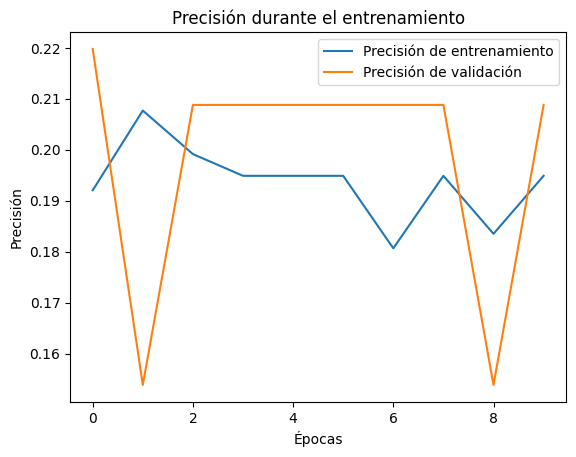

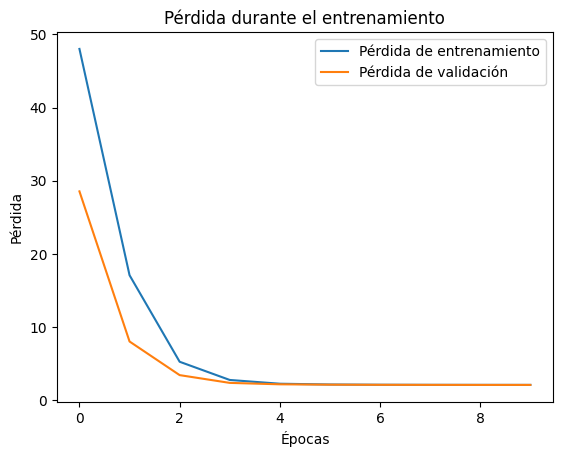

In [22]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model11.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Pérdida: {loss:.4f}, Precisión: {accuracy:.4f}')

# Graficar precisión
import matplotlib.pyplot as plt

# Graficar precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento')
plt.show()

# Graficar pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento')
plt.show()

MODELO_12

In [52]:
model12 = Sequential()

# Primera capa convolucional
model12.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model12.add(MaxPooling2D(pool_size=(2, 2)))
model12.add(Dropout(0.25))  # Dropout para reducir el sobreajuste

# Segunda capa convolucional
model12.add(Conv2D(32, (3, 3), activation='relu'))

model12.add(MaxPooling2D(pool_size=(2, 2)))
model12.add(Dropout(0.25))

# Tercera capa convolucional


# Cuarta capa convolucional (capacidad adicional para capturar características más complejas)
model12.add(Conv2D(64, (3, 3), activation='relu'))

model12.add(MaxPooling2D(pool_size=(2, 2)))
model12.add(Dropout(0.25))

# Capa de aplanamiento
model12.add(Flatten())


# Capa de salida
model12.add(Dense(train_generator.num_classes, activation='softmax'))

# Compilar el modelo
optimizer = Adam(learning_rate=0.0005)  # Aprendizaje más lento para mayor estabilidad
model12.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model12.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_49 (Conv2D)                   │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_49 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 61, 61, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_50 (MaxPooling2D)      │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_51 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_42 (Dropout)                 │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 6)                   │          75,270 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 103,334 (403.65 KB)

 Trainable params: 103,334 (403.65 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
# Entrenar el modelo con datos de entrenamiento y validación
history = model12.fit(
    train_generator,  # Generador de datos de entrenamiento
    epochs=10,        # Número de épocas (puedes ajustar según sea necesario)
    validation_data=test_generator,  # Generador de datos de validación/prueba
)

loss, accuracy = model12.evaluate(test_generator)
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {accuracy}')

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 24s 939ms/step - accuracy: 0.1651 - loss: 1.8063 - val_accuracy: 0.2088 - val_loss: 1.7847
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 862ms/step - accuracy: 0.2299 - loss: 1.7589 - val_accuracy: 0.2418 - val_loss: 1.7835
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 785ms/step - accuracy: 0.2524 - loss: 1.7421 - val_accuracy: 0.2527 - val_loss: 1.7764
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 791ms/step - accuracy: 0.2637 - loss: 1.7159 - val_accuracy: 0.2308 - val_loss: 1.7663
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 806ms/step - accuracy: 0.3254 - loss: 1.6699 - val_accuracy: 0.2527 - val_loss: 1.7533
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 22s 895ms/step - accuracy: 0.3541 - loss: 1.6224 - val_accuracy: 0.2637 - val_loss: 1.7380
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 811ms/step - accuracy: 0.3730 - loss: 1.5687 - val_accuracy: 0.2637 - val_loss: 1.7374
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 811ms/step - accuracy: 0.3583 - loss: 1.5218 - val_accu

In [54]:
#Generar predicciones en los datos de prueba
y_pred = model12.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Obtener las clases predichas

# Verdaderas etiquetas (si usas un generator, accede a .classes)
y_true = test_generator.classes

# Obtener el reporte de clasificación
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys(), output_dict=True)

# Imprimir el reporte completo
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Extraer las métricas individuales y calcular los promedios
precision = np.mean([report[key]['precision'] for key in report if key != 'accuracy'])
recall = np.mean([report[key]['recall'] for key in report if key != 'accuracy'])
f1_score = np.mean([report[key]['f1-score'] for key in report if key != 'accuracy'])

# Imprimir los promedios
print(f"\nPromedio de Precisión: {precision:.4f}")
print(f"Promedio de Recall: {recall:.4f}")
print(f"Promedio de F1-Score: {f1_score:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step
                       precision    recall  f1-score   support

    Avulsion fracture       0.19      0.36      0.24        14
  Comminuted fracture       0.27      0.21      0.24        14
 Fracture Dislocation       0.22      0.11      0.14        19
  Greenstick fracture       0.05      0.06      0.06        16
    Hairline Fracture       0.33      0.20      0.25        10
Pathological fracture       0.21      0.22      0.22        18

             accuracy                           0.19        91
            macro avg       0.21      0.19      0.19        91
         weighted avg       0.20      0.19      0.18        91


Promedio de Precisión: 0.2117
Promedio de Recall: 0.1927
Promedio de F1-Score: 0.1908


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 448ms/step - accuracy: 0.2812 - loss: 1.7788
Pérdida: 1.7364, Precisión: 0.2969


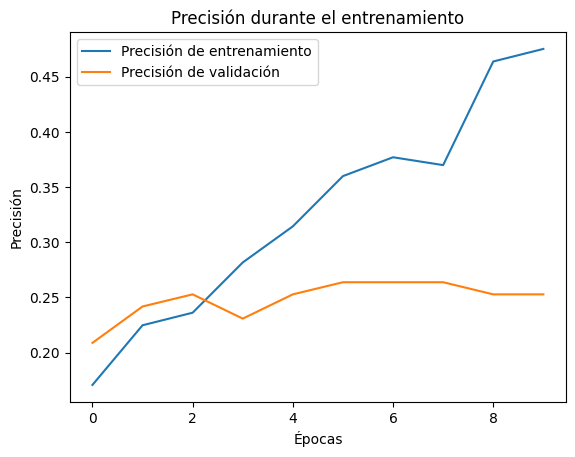

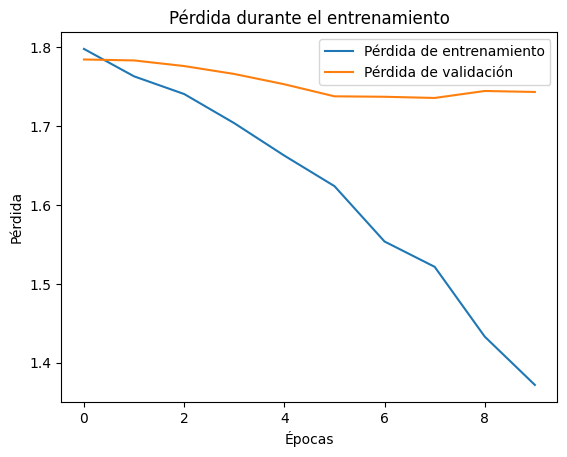

In [56]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model12.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Pérdida: {loss:.4f}, Precisión: {accuracy:.4f}')

# Graficar precisión
import matplotlib.pyplot as plt

# Graficar precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento')
plt.show()

# Graficar pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento')
plt.show()